Explore trends in experimental data

In [127]:
from collections import OrderedDict
from pprint import pprint
from warnings import warn

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [128]:
split_data = {}
cell_types =  ["HepG2", "K562"]
promoters = ["SV40P", "minP"]
design_names = ["ScaleUpDesign1", "ScaleUpDesign2"]

for cell_type in cell_types:
    for promoter in promoters:
        experiment_key = (cell_type, promoter)

        for design_name in design_names:
            split_data[experiment_key] = {}

            with open("../data/Scaleup_normalized/{}_{}_{}_mRNA_Rep1.normalized".format(cell_type, design_name, promoter)) as f:
                for line in f:
                    parts = line.strip().split()

                    key = parts[0]
                    val = float(parts[1])
                    if parts[2] == "1":
                        split_data[experiment_key][key] = (val, 0)

            with open("../data/Scaleup_normalized/{}_{}_{}_mRNA_Rep2.normalized".format(cell_type, design_name, promoter)) as f:
                for line in f:
                    parts = line.strip().split()

                    key = parts[0]
                    val = float(parts[1])
                    if parts[2] == "1" and key in split_data[experiment_key]:
                        split_data[experiment_key][key] = (split_data[experiment_key][key][0], val)

print "Data from experiment {}:".format(split_data.items()[0][0])
pprint(split_data.items()[0][1].items()[:5])

Data from experiment ('HepG2', 'minP'):
[('H1hesc_9_213_18_chr2_26895415', (1.2584637003845778, -4.259193703616347)),
 ('K562_14_89_10_chr19_14848415', (0.7648163664093701, -2.293409418954255)),
 ('H1hesc_8_354_3_chr5_174622815', (-0.7941509257788404, -0.6748385255902782)),
 ('H1hesc_5_1094_24_chr4_40311455',
  (-6.0328451594443955, -0.1252866601459317)),
 ('Huvec_12_379_1_chr14_67894115', (-3.148737959480158, -0.5824728799359882))]


In [129]:
data = {}
for experiment_key, key_to_split in split_data.items():
    data[experiment_key] = {}
    for key, val in key_to_split.items():
        data[experiment_key][key] = sum(list(split_data[experiment_key][key])) / 2.0
    

In [130]:
valid_keys = list(reduce(
    lambda acc, d: acc.intersection(d.keys()), 
    data.values()[1:], 
    set(data.values()[0].keys())
))

print "{} sequences have measurements for all tasks.".format(len(valid_keys))

129623 sequences have measurements for all tasks.


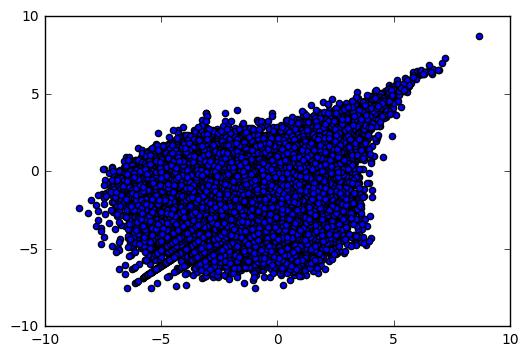

('HepG2', 'minP')
[[ 4.03704792  0.97697872]
 [ 0.97697872  2.45105392]] (2, 129623)


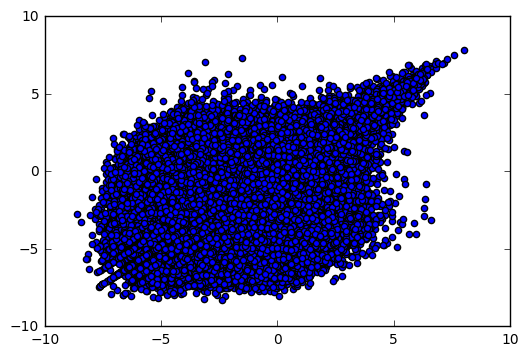

('K562', 'minP')
[[ 5.52860149  2.07177157]
 [ 2.07177157  5.90437803]] (2, 129623)


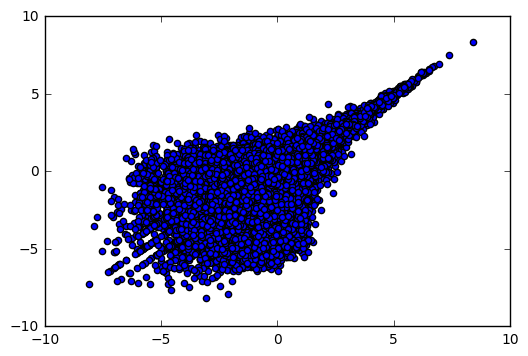

('HepG2', 'SV40P')
[[ 1.21007951  0.77681318]
 [ 0.77681318  1.9681499 ]] (2, 129623)


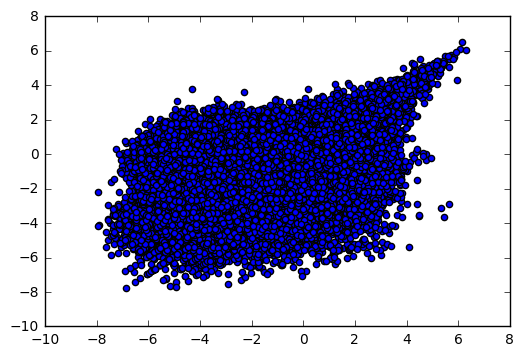

('K562', 'SV40P')
[[ 4.18880027  1.51187355]
 [ 1.51187355  2.60746312]] (2, 129623)


In [131]:
# Variance between replicates
for experiment_key, key_to_normalized in split_data.items():
    vals = np.array([[key_to_normalized[key][0] for key in valid_keys],
                 [key_to_normalized[key][1] for key in valid_keys]])
    plt.scatter(vals[0, :], vals[1, :])
    plt.show()
    print experiment_key
    print np.cov(vals), vals.shape

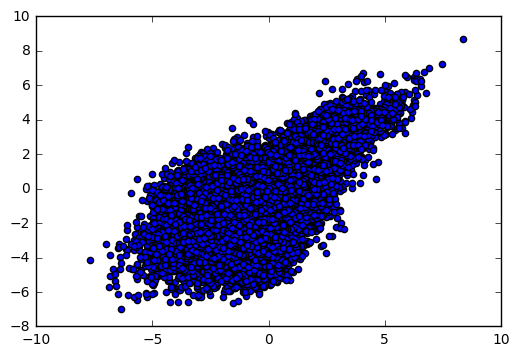

HepG2
[[ 1.18296394  0.75413076]
 [ 0.75413076  2.11051482]] (2, 129623)


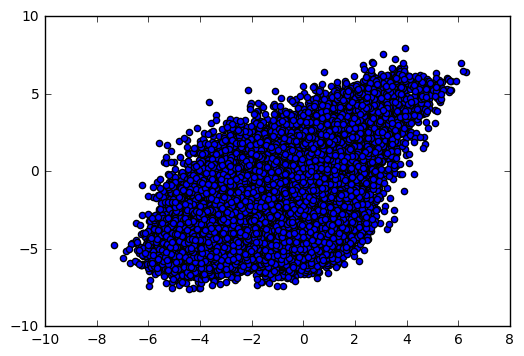

K562
[[ 2.45500262  1.37447673]
 [ 1.37447673  3.89413067]] (2, 129623)


In [132]:
# Variance between promotors
for cell_type in cell_types:
    vals = np.array([[data[(cell_type, promoter)][key] for key in valid_keys] for promoter in promoters])
    plt.scatter(vals[0], vals[1])
    plt.show()
    print cell_type
    print np.cov(vals), vals.shape

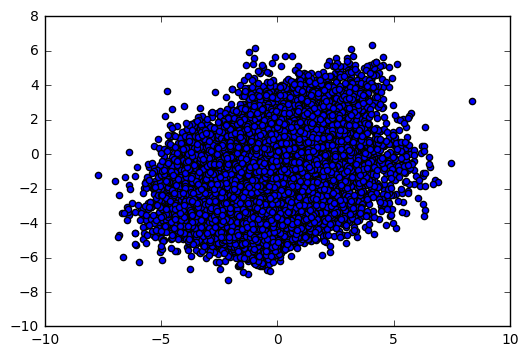

SV40P [[ 1.18296394  0.47318998]
 [ 0.47318998  2.45500262]] (2, 129623)


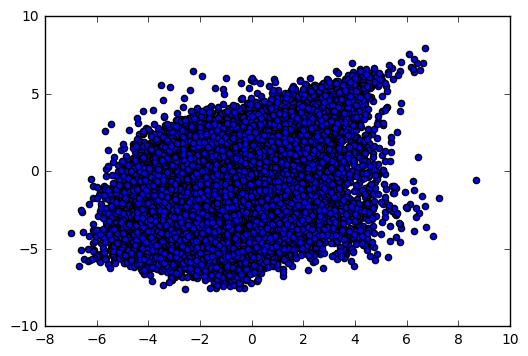

minP [[ 2.11051482  0.87321853]
 [ 0.87321853  3.89413067]] (2, 129623)


In [133]:
# Variance between cell types
for promoter in promoters:
    vals = np.array([[data[(cell_type, promoter)][key] for key in valid_keys] for cell_type in cell_types])
    plt.scatter(vals[0], vals[1])
    plt.show()
    print promoter, np.cov(vals), vals.shape

In [134]:
def plot_scaled(scaler):
    for experiment_key, key_to_normalized in data.items():
        vals = scaler(np.array([key_to_normalized[key] for key in valid_keys]).reshape(-1, 1))
        plt.hist(vals, bins = 100)
        plt.title(experiment_key)
        plt.show()
        print "Variance for {} is {}".format(experiment_key, np.var(vals))
        print "Min is {} and Max is {}".format(np.min((vals)), np.max(vals))
        print "Mean is {}".format(np.mean(vals))

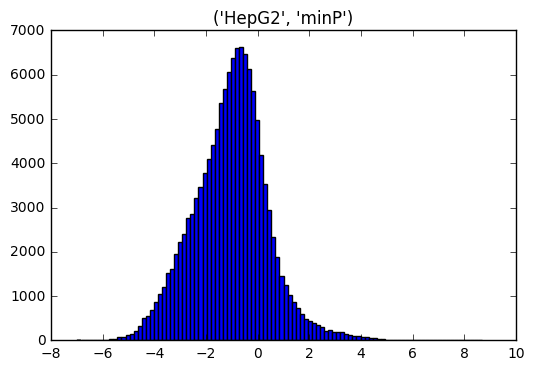

Variance for ('HepG2', 'minP') is 2.11049853579
Min is -6.99911395739 and Max is 8.68406510524
Mean is -1.04540227257


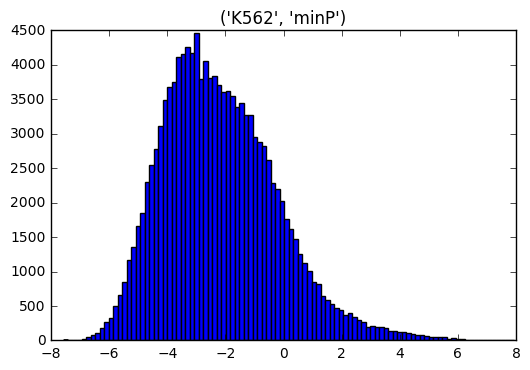

Variance for ('K562', 'minP') is 3.89410062344
Min is -7.56201617336 and Max is 7.93556542131
Mean is -2.18324335613


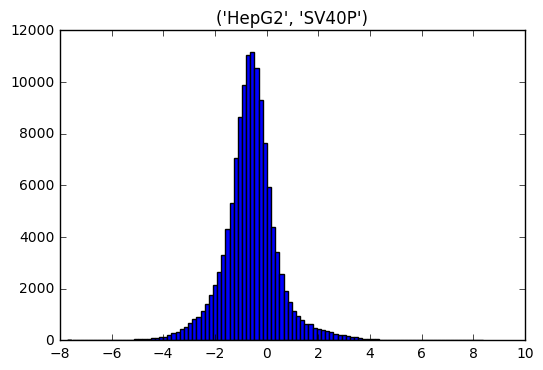

Variance for ('HepG2', 'SV40P') is 1.18295481565
Min is -7.70049169401 and Max is 8.37099300631
Mean is -0.604284197941


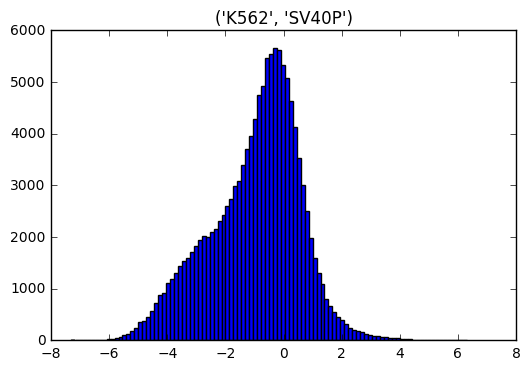

Variance for ('K562', 'SV40P') is 2.45498368239
Min is -7.31382998171 and Max is 6.31441517117
Mean is -0.985182226466


In [135]:
plot_scaled(lambda x: x)

Scale all the (normalized) measurements so they are between -1 and 1.

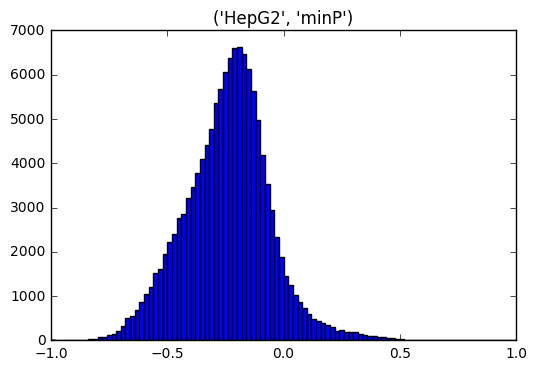

Variance for ('HepG2', 'minP') is 0.0343223364657
Min is -1.0 and Max is 1.0
Mean is -0.240751934152


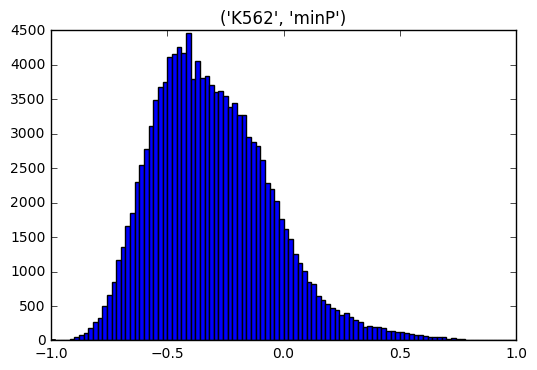

Variance for ('K562', 'minP') is 0.0648543778722
Min is -1.0 and Max is 1.0
Mean is -0.305856493237


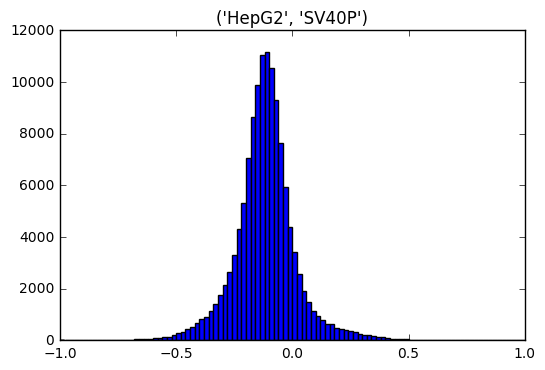

Variance for ('HepG2', 'SV40P') is 0.0183196068627
Min is -1.0 and Max is 1.0
Mean is -0.116919484616


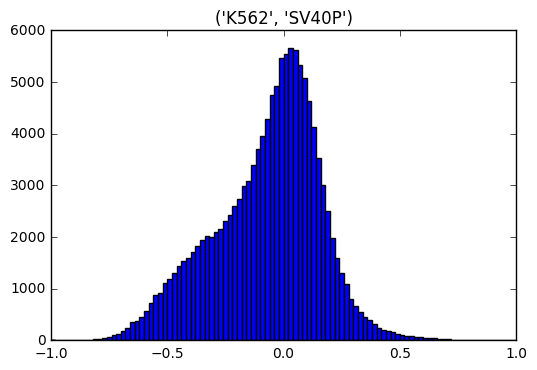

Variance for ('K562', 'SV40P') is 0.0528723637277
Min is -1.0 and Max is 1.0
Mean is -0.0712453901069


In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
plot_scaled(scaler.fit_transform)

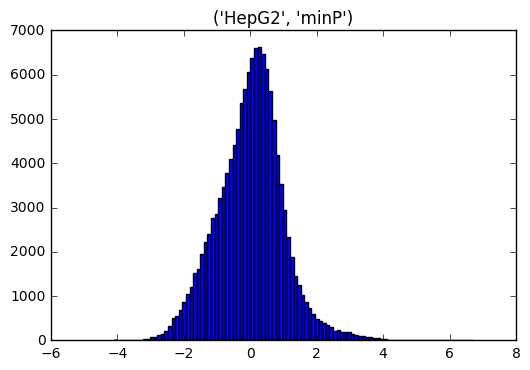

Variance for ('HepG2', 'minP') is 1.0
Min is -4.09822003405 and Max is 6.69725042784
Mean is 1.22979920823e-16


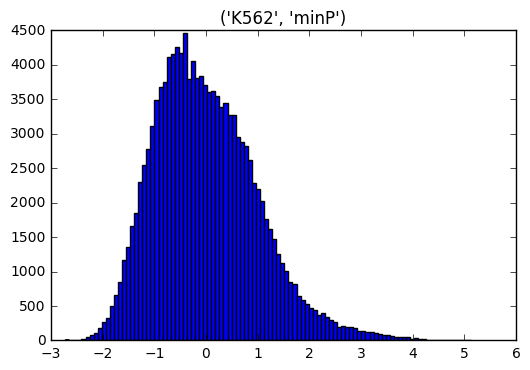

Variance for ('K562', 'minP') is 1.0
Min is -2.72570980649 and Max is 5.12773772975
Mean is -1.73821853768e-16


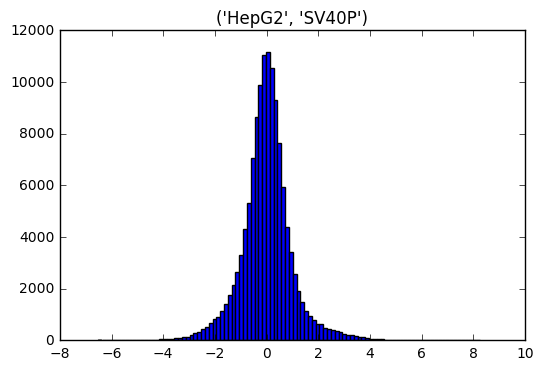

Variance for ('HepG2', 'SV40P') is 1.0
Min is -6.52442476745 and Max is 8.25208689551
Mean is -8.51568116772e-17


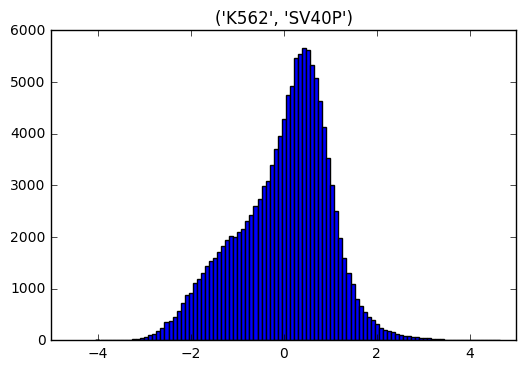

Variance for ('K562', 'SV40P') is 1.0
Min is -4.03911872702 and Max is 4.65880574947
Mean is -1.80344969693e-17


In [137]:
from sklearn.preprocessing import scale
plot_scaled(scale)

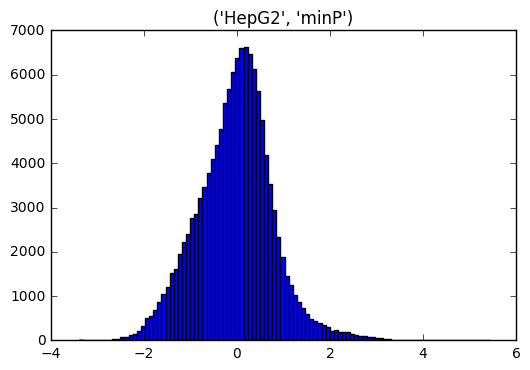

Variance for ('HepG2', 'minP') is 0.668642857367
Min is -3.39181745676 and Max is 5.43570189504
Mean is -0.0406789597152


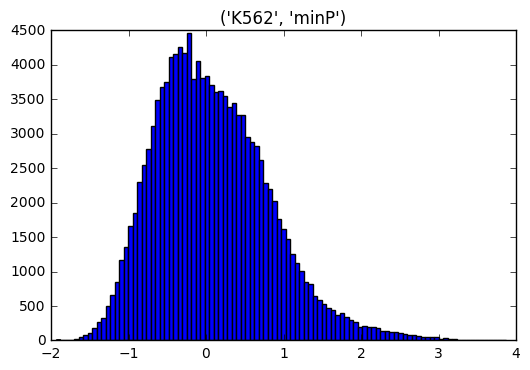

Variance for ('K562', 'minP') is 0.546040708239
Min is -1.93127542306 and Max is 3.87199565514
Mean is 0.0828760454005


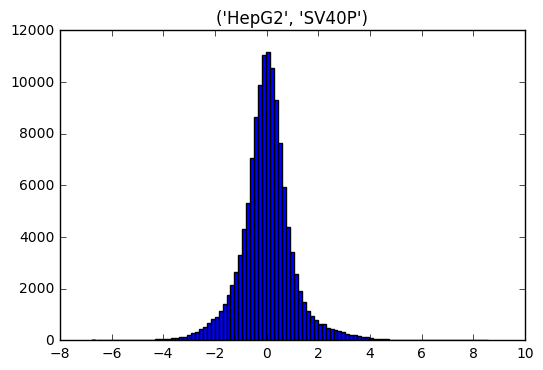

Variance for ('HepG2', 'SV40P') is 1.07710049246
Min is -6.76478475251 and Max is 8.57078914754
Mean is 0.00648849917207


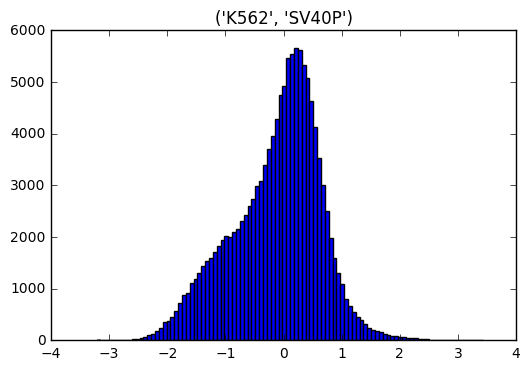

Variance for ('K562', 'SV40P') is 0.583286881948
Min is -3.20901119629 and Max is 3.43387384872
Mean is -0.124206142017


In [138]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
plot_scaled(scaler.fit_transform)